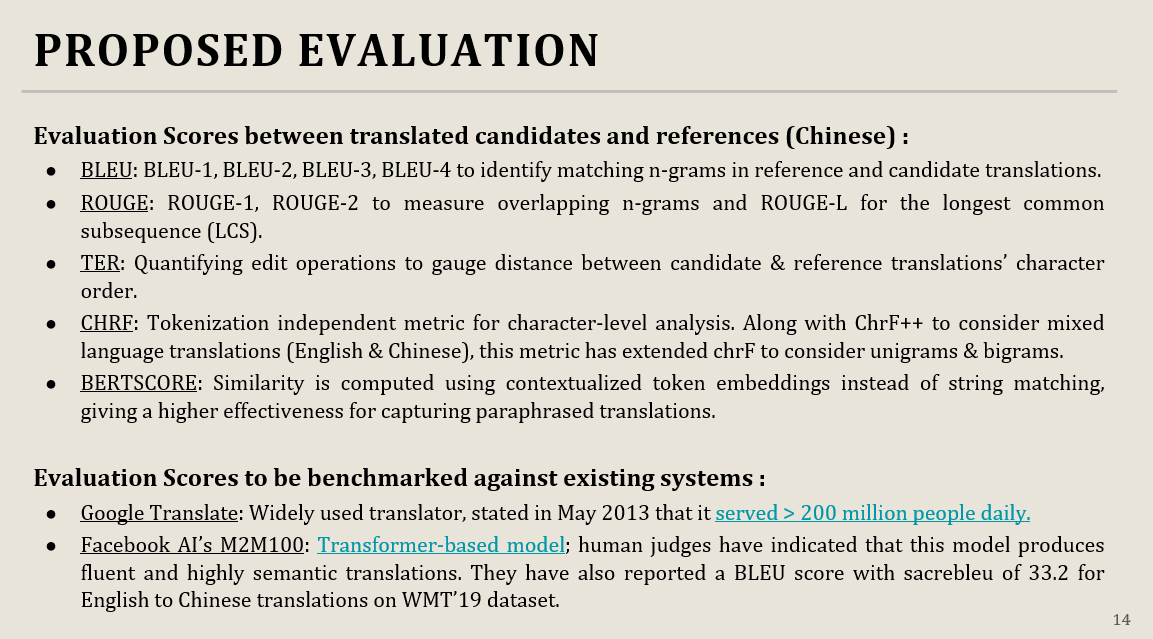

## For google colab 

In [6]:
# !pip install sacrebleu
# !pip install rouge-chinese
# !pip install torch torchvision torchaudio
# Everything above : https://github.com/mjpost/sacrebleu
# !pip install bert-score 
# BERTSCORE : https://github.com/Tiiiger

# **EVAL METRICS**

## Example statement

In [7]:
from sacrebleu.metrics import BLEU, CHRF, TER
refs = [
         ['非常谢谢，克里斯。的确非常荣幸 能有第二次站在这个台上的机会，我真是非常感激']
       ]
sys = ['非常感谢你，克里斯。非常荣幸有机会两次登上这个舞台；我非常感激']


## BLEU-1 , BLEU-2 , BLEU-3, BLEU-4



In [8]:

for i in range(1,5):
  print(f"{i}. BLEU-{i}")
  bleu = BLEU(smooth_method='exp', tokenize='zh', max_ngram_order=i)
  print(bleu.corpus_score(sys, refs))
  print(50*'-')


# uncomment below if you've done your own tokenization
# for i in range(1,5):
#   print(f"- BLEU-{i}")
#   bleu = BLEU(smooth_method='exp', tokenize='none', max_ngram_order=i)
#   print(bleu.corpus_score(sys, refs))
#   print(50*'-')

# uncomment to get signature for comparisons / report
# print(bleu.get_signature())


1. BLEU-1
BLEU = 66.45 80.6 (BP = 0.824 ratio = 0.838 hyp_len = 31 ref_len = 37)
--------------------------------------------------
2. BLEU-2
BLEU = 48.71 80.6/43.3 (BP = 0.824 ratio = 0.838 hyp_len = 31 ref_len = 37)
--------------------------------------------------
3. BLEU-3
BLEU = 36.14 80.6/43.3/24.1 (BP = 0.824 ratio = 0.838 hyp_len = 31 ref_len = 37)
--------------------------------------------------
4. BLEU-4
BLEU = 27.30 80.6/43.3/24.1/14.3 (BP = 0.824 ratio = 0.838 hyp_len = 31 ref_len = 37)
--------------------------------------------------


## CHRF / CHRF++

In [9]:
# Arguments (more at github page)
# word_order  (pass 2 for chrF++)
# beta = determines imp of recall compared to precision in computation of F-score.
# F-score = (1 + beta^2) * (precision * recall) / ((beta^2 * precision) + recall)
# eps_smoothing = technique used to avoid division by zero errors and stabilize computation of precision and recall.

print(f"1. CHRF")
chrf = CHRF(word_order=0, beta=0, eps_smoothing=False)
print(chrf.corpus_score(sys, refs))
print(50*'-')

print(f"2. CHRF++")
chrf = CHRF(word_order=2, beta=0, eps_smoothing=False)
print(chrf.corpus_score(sys, refs))
print(50*'-')


1. CHRF
chrF0 = 27.68
--------------------------------------------------
2. CHRF++
chrF0++ = 23.73
--------------------------------------------------


## TER

In [10]:
# Arguments
# --ter-case-sensitive  Enables case sensitivity (Default: False)
# --ter-asian-support   Enables special treatment of Asian characters (Default: False)
# --ter-no-punct        Removes punctuation. (Default: False)
# --ter-normalized      Applies basic normalization and tokenization. (Default: False)

ter = TER(asian_support=True, normalized=True)

print(ter.corpus_score(sys, refs))

TER = 43.24


## ROUGE-1, ROUGE-2, ROUGE-L

In [11]:
from rouge_chinese import Rouge
import jieba # you can use any other word cutting library

hypothesis = "非常感谢你，克里斯。非常荣幸有机会两次登上这个舞台；我非常感激"
hypothesis = ' '.join(jieba.cut(hypothesis))

reference = "非常谢谢，克里斯。的确非常荣幸 能有第二次站在这个台上的机会，我真是非常感激"
reference = ' '.join(jieba.cut(reference))

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)

print(scores)

Building prefix dict from the default dictionary ...


Dumping model to file cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.609 seconds.
Prefix dict has been built successfully.


[{'rouge-1': {'r': 0.5263157894736842, 'p': 0.625, 'f': 0.5714285664653063}, 'rouge-2': {'r': 0.15, 'p': 0.2, 'f': 0.1714285665306124}, 'rouge-l': {'r': 0.42857142857142855, 'p': 0.5625, 'f': 0.48648648157779395}}]


## BERTSCORE



1.   **F1**: BERTScore's F1 score is computed based on the similarity of embeddings generated by a BERT model for both the system output and the reference text. It takes into account the precision and recall of the system output compared to the reference text, considering the semantic similarity between the two. BERTScore's F1 score is designed to provide a more informative evaluation of the quality of generated text by capturing semantic similarity.

2.   **PRECISION (P)**: BERTScore's Precision measures the proportion of correctly identified relevant items among all items that were identified as relevant. It indicates how well the generated text captures relevant information present in the reference text.
3.   **Recall (R)**: BERTScore's Recall measures the proportion of correctly identified relevant items among all relevant items that exist. It indicates how much of the relevant information present in the reference text is captured by the generated text.

Inputs to `score` are a list of candidate sentences and a list of reference sentences.

In [12]:
import torch
from bert_score import score

c:\Users\user\OneDrive\Documents\GitHub\cs4248-neural-translation\venvE2C\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
P, R, F1 = score(sys, refs, lang='zh') # default model for zh is bert-base-chinese

print(P, R, F1) # Precision, Recall and F1

c:\Users\user\OneDrive\Documents\GitHub\cs4248-neural-translation\venvE2C\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--bert-base-chinese. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tensor([0.8749]) tensor([0.8362]) tensor([0.8551])
